In [108]:
## Endos Renyi Random network model 
import networkx as nx
import numpy as np 
from matplotlib import pyplot as plt
from random import sample

def smallworld_graph(n,c,p):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(int(c/2)):
            A[i,(i+j+1)%n] = 1
            if np.random.rand()<p:   # With probabilty p 
                rewire_index = sample(list(np.where(np.logical_not(A[i,:])&np.logical_not(range(n)==i))[0]),1)
                # rewire the edge to another node with no connection     and     not to itself
                A[i,(i+j+1)%n] = 0              # remove the existing edge
                A[i,rewire_index] = 1           # rewire the edge
    A = A + np.transpose(A)                     # make the adjacency matrix symmetric
    return(A)

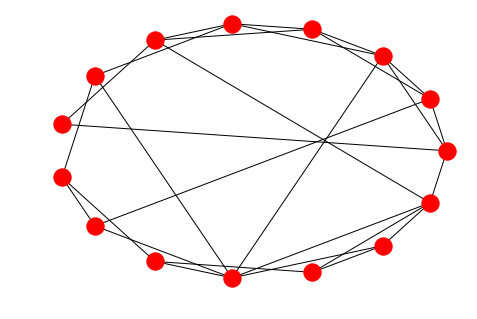

In [120]:
n = 15
c = 4
p = 0.2
A = smallworld_graph(n,c,p)
G = nx.from_numpy_matrix(A)
nx.draw_circular(G, markersize = 0.01)